# **K-Means Clustering for E-commerce Customer Segmentation Analysis:**

## Introduction

This project focuses on performing a customer segmentation analysis for an e-commerce company. The objective is to group customers into distinct segments based on their behavior and purchase patterns, utilizing clustering algorithms. These segments will help inform targeted marketing strategies, improve customer satisfaction, and enhance business strategies.

### Key Concepts:

1. **Data Collection**: Obtaining customer information, purchase history, and related data.
2. **Data Exploration and Cleaning**: Understanding the structure of the dataset and handling missing or inconsistent data.
3. **Descriptive Statistics**: Calculating key metrics such as average purchase value and frequency of purchases.
4. **Customer Segmentation**: Using clustering algorithms like K-means to group customers based on behavior.
5. **Visualization**: Representing customer segments through scatter plots and other visualizations.
6. **Insights and Recommendations**: Analyzing each segment and providing insights for business improvements.

### Learning Objectives:

- Gain hands-on experience with clustering algorithms.
- Enhance skills in data exploration and cleaning.
- Develop visualization techniques to communicate insights effectively.


## Step 1: **Data Collection:**
Obtaining a dataset containing customer information, purchase history, and
relevant data.


In [1]:
import pandas as pd

# Load the dataset from the provided path
file_path = 'E:\DA\Projects\Oasis Infobyte\Project 4\ifood_df.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


## Step 2: **Data Exploration and Cleaning:**

In this step, we will explore the dataset to understand its structure, identify any missing or inconsistent values, and ensure it is ready for further analysis.

### Key Actions:
1. **Check for missing values**: Identify any null or missing values in the dataset.
2. **Summarize data**: Get an overview of data types, summary statistics, and any outliers.
3. **Data cleaning**: If necessary, handle missing or inconsistent data.

We'll proceed by loading the data and performing these actions.


In [2]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the missing values
missing_values


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [3]:
# Get summary statistics of the dataset
summary_stats = df.describe()

# Display the summary statistics
summary_stats


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


### Insights:

1. **Missing Values**:
   - There are no missing values in any of the columns. This is beneficial as it ensures we can proceed without needing to impute or handle missing data.

2. **Summary Statistics**:
   - **Income**: The income of customers ranges from \$1,730 to \$113,734, with a mean of \$51,622. This wide range indicates that customers come from diverse financial backgrounds, which may influence their purchasing behavior.
   - **Recency**: The number of days since the last purchase varies between 0 and 99 days, with a median of 49 days. This suggests some customers are very recent, while others haven't purchased in a while.
   - **Spending on Products**:
     - **MntWines** has the highest mean spending (\$306), indicating that wine is a popular product among customers.
     - Other categories like **MntMeatProducts** and **MntFishProducts** show significant spending as well, though on average, they are lower than wines.
   - **Binary Features**: Columns such as `AcceptedCmp1` to `AcceptedCmp5`, `Response`, and `Complain` represent customer behavior regarding marketing campaigns, complaints, and responses. These will be important for segmenting customers based on behavior.

## Step 3: **Descriptive Statistics:**

### Objective:
In this step, we will calculate key descriptive statistics to better understand customer behavior. These metrics will help identify patterns in customer purchasing habits and prepare us for the clustering step.

### Key Metrics:
1. **Average Purchase Value**: Calculate the total and average amount customers spent across all product categories.
2. **Purchase Frequency**: Identify how frequently customers made purchases, either online, in-store, or through other channels.
3. **Campaign Response**: Analyze customer responses to marketing campaigns.

### Next Actions:
- Calculate and display key statistics such as average total spending, frequency of purchases across different platforms (web, catalog, store), and responses to campaigns.


In [4]:
# Calculate key descriptive statistics

# 1. Average purchase value for each customer (sum of spending on all products)
df['Total_Purchase_Value'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# 2. Average total spending
avg_purchase_value = df['Total_Purchase_Value'].mean()

# 3. Purchase frequency: sum of various purchase channels
df['Purchase_Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                'NumStorePurchases']].sum(axis=1)

# Average purchase frequency
avg_purchase_frequency = df['Purchase_Frequency'].mean()

# 4. Campaign response: Overall response to campaigns
campaign_response = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()

# Prepare the results in a dictionary
descriptive_stats = {
    "Average Purchase Value": avg_purchase_value,
    "Average Purchase Frequency": avg_purchase_frequency,
    "Campaign Response Rates (average for each campaign)": campaign_response
}

descriptive_stats


{'Average Purchase Value': 606.821768707483,
 'Average Purchase Frequency': 14.88798185941043,
 'Campaign Response Rates (average for each campaign)': AcceptedCmp1    0.064399
 AcceptedCmp2    0.013605
 AcceptedCmp3    0.073923
 AcceptedCmp4    0.074376
 AcceptedCmp5    0.073016
 Response        0.151020
 dtype: float64}

### Key Metrics:

1. **Average Purchase Value**:
   - The average total purchase value per customer (across all product categories) is approximately **\$606.82**. This gives us an idea of how much customers typically spend over time.

2. **Average Purchase Frequency**:
   - On average, customers made **14.89 purchases** across various channels (deals, web, catalog, and store). This indicates how frequently customers are engaging with the platform.

3. **Campaign Response**:
   - **Campaign 1**: 6.44% of customers responded to the first campaign.
   - **Campaign 2**: 1.36% of customers responded to the second campaign.
   - **Campaign 3**: 7.39% of customers responded to the third campaign.
   - **Campaign 4**: 7.44% of customers responded to the fourth campaign.
   - **Campaign 5**: 7.30% of customers responded to the fifth campaign.
   - **Latest Campaign** (Response): 15.10% of customers responded to the most recent campaign.

These metrics provide a foundational understanding of customer spending behavior and interaction with marketing campaigns.

### Next Steps:
We will proceed with **Customer Segmentation**, where we will group customers into clusters based on these behaviors.


## Step 4: **Customer Segmentation:**

### Objective:
The goal of this step is to segment customers based on their purchase behavior and response to marketing campaigns. By grouping customers into clusters, we can identify different customer profiles, which will allow for targeted marketing strategies and personalized recommendations.

### Key Actions:
1. **Feature Selection**: Select the relevant features that represent customer behavior and purchase patterns.
2. **Scaling**: Since the features have different scales, we'll standardize the data to ensure the clustering algorithm treats all features equally.
3. **K-means Clustering**: We'll apply the K-means clustering algorithm to group customers into distinct clusters.
4. **Optimal Cluster Selection**: We'll use the "elbow method" to determine the optimal number of clusters.

### Selected Features:
We will use the following features for clustering:
- **Income**: Customer's annual income.
- **Recency**: Number of days since the last purchase.
- **Total_Purchase_Value**: Total amount spent across all product categories.
- **Purchase_Frequency**: Total number of purchases made across all channels.
- **Response**: Customer's response to the most recent marketing campaign.

We will now implement K-means clustering and determine the optimal number of clusters using the elbow method.


## Step 4.1: Feature Selection and Scaling

### Objective:
To select relevant features that represent customer behavior and scale them using StandardScaler. Scaling is necessary because features like income and purchase frequency have different units and ranges, which can affect clustering performance.

### Steps:
1. Select the relevant features for clustering.
2. Standardize the features using StandardScaler to ensure uniformity in the scale of data.


In [5]:
from sklearn.preprocessing import StandardScaler

# Step 1: Feature Selection
features = df[['Income', 'Recency', 'Total_Purchase_Value', 'Purchase_Frequency', 'Response']]

# Step 2: Feature Scaling using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back into a DataFrame for better understanding
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled data
scaled_df.head()


,Income,Recency,Total_Purchase_Value,Purchase_Frequency,Response
0,0.314651,0.310830,1.679323,1.328161,2.370996
1,-0.254877,-0.380600,-0.963897,-1.167390,-0.421764
2,0.965354,-0.795458,0.281242,0.802782,-0.421764
3,-1.206087,-0.795458,-0.920675,-0.904700,-0.421764
4,0.322136,1.555404,-0.307248,0.540092,-0.421764


### Insights:
1. **Selected Features**:
   - We selected the following features for clustering:
     - **Income**: Annual income of the customer.
     - **Recency**: Number of days since the last purchase.
     - **Total Purchase Value**: The total amount spent across all product categories.
     - **Purchase Frequency**: The total number of purchases made across various channels.
     - **Response**: Whether the customer accepted the most recent marketing campaign.

2. **Feature Scaling**:
   - The selected features were standardized using **StandardScaler**, which transforms the features to have a mean of 0 and a standard deviation of 1. This step ensures that no single feature dominates the clustering process due to its larger scale.

### Next Steps:
Now that the data is scaled, we will proceed with applying **K-means clustering** and determining the optimal number of clusters using the elbow method.

## Step 4.2: Applying K-means and Using the Elbow Method:

### Objective:
The goal of this step is to segment customers into distinct groups using the K-means clustering algorithm. To determine the optimal number of clusters, we will use the elbow method, which helps us visualize the trade-off between the number of clusters and the inertia (within-cluster sum of squares). 

### Key Actions:
1. **K-means Clustering**: We will apply K-means clustering with a range of cluster numbers (k = 1 to 10).
2. **Inertia Calculation**: For each value of k, we will calculate the inertia (the sum of squared distances from each point to its assigned cluster center).
3. **Elbow Method**: We will plot the inertia values and observe where the "elbow" occurs in the graph. The elbow point is where adding more clusters no longer provides a significant reduction in inertia, suggesting the optimal number of clusters.

### Next Steps:
We will now run the K-means algorithm and plot the elbow method to identify the optimal number of clusters for customer segmentation.


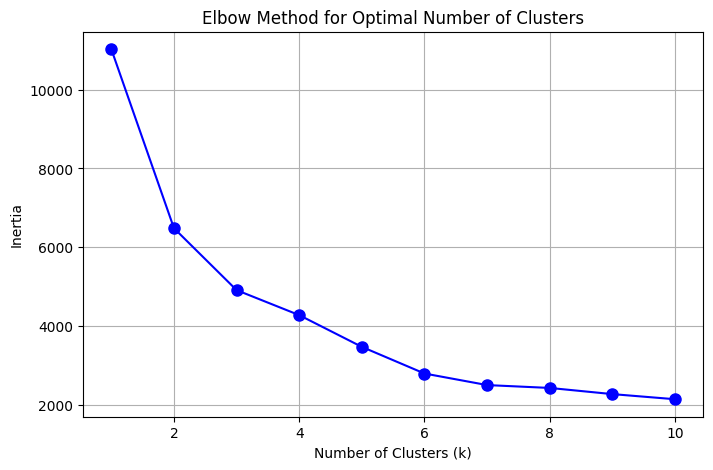

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Apply K-means for different numbers of clusters and calculate inertia
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Step 2: Plot the inertia values for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


### Insights:
- The **elbow plot** shows a significant decrease in inertia between 1 and 5 clusters.
- After 5 clusters, the rate of decrease in inertia slows down, indicating that additional clusters provide diminishing returns.
- The "elbow" is clearly visible at **5 clusters**, suggesting that this is the optimal number of clusters for segmenting the customers.

### Conclusion:
Based on the elbow method, the optimal number of clusters is **5**. We will proceed by applying K-means clustering with **5 clusters** to segment the customers.

## Step 4.3: Applying K-means Clustering:

### Objective:
We will now apply the K-means clustering algorithm with the optimal number of clusters (5). Each customer will be assigned to a cluster based on their behavior, which will help us identify distinct customer segments.

### Key Actions:
1. Apply the K-means algorithm using **5 clusters**.
2. Assign each customer to a cluster.
3. Add the cluster assignment as a new column in the dataset for further analysis.

We will analyze the characteristics of each cluster in the next step.


In [7]:
# Apply K-means clustering with the optimal number of clusters (5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Display the first few rows with the cluster assignments
df[['Income', 'Recency', 'Total_Purchase_Value', 'Purchase_Frequency', 'Response', 'Cluster']].head()


,Income,Recency,Total_Purchase_Value,Purchase_Frequency,Response,Cluster
0,58138.0,58,1617,25,1,0
1,46344.0,38,27,6,0,4
2,71613.0,26,776,21,0,2
3,26646.0,26,53,8,0,4
4,58293.0,94,422,19,0,3


### Insights:
- Each customer is now associated with a **Cluster** (from 0 to 4), representing one of the 5 segments identified by the algorithm.
- For example:
  - **Customer 0** belongs to **Cluster 0**, with an income of \$58,138, a recency of 58 days since the last purchase, and a total purchase value of \$1,617.
  - **Customer 1** belongs to **Cluster 4**, with an income of \$46,344, a recency of 38 days, and a total purchase value of \$27.
  - **Customer 2** belongs to **Cluster 2**, with an income of \$71,613 and a total purchase value of \$776.

### Next Steps:
We will analyze the characteristics of each cluster to gain insights into customer behavior within each segment. This will help in understanding the distinct profiles of the customer groups.

## Step 4.4: Analyzing Cluster Characteristics:

### Objective:
The goal of this step is to analyze the characteristics of each cluster to understand the differences in customer behavior. By examining key features such as income, recency, total purchase value, and campaign response, we can create distinct profiles for each customer segment.

### Key Actions:
1. Calculate the average values for key features (Income, Recency, Total Purchase Value, Purchase Frequency, and Response) within each cluster.
2. Compare these averages to identify the unique characteristics of each cluster.


In [8]:
# Group the data by clusters and calculate the mean for key features
cluster_analysis = df.groupby('Cluster').mean()[['Income', 'Recency', 'Total_Purchase_Value', 'Purchase_Frequency', 'Response']]

# Display the analysis
cluster_analysis


,Income,Recency,Total_Purchase_Value,Purchase_Frequency,Response
Cluster,,,,,
0,69754.893701,37.771654,1263.318898,20.744094,1.000000
1,36423.432014,73.607573,131.526678,9.024096,0.013769
2,66848.339332,25.645244,977.506427,21.550129,0.000000
3,68429.188053,73.730088,1112.754425,21.345133,0.000000
4,34050.973535,23.446125,108.746692,8.100189,0.134216


### Insights:

1. **Cluster 0**:
   - **Income**: \$69,755
   - **Recency**: 38 days since the last purchase.
   - **Total Purchase Value**: \$1,263.
   - **Purchase Frequency**: 20.7 purchases.
   - **Response**: 100% of customers in this cluster responded to the most recent marketing campaign.
   - **Profile**: This cluster represents high-income customers with frequent purchases and high spending. They are highly responsive to marketing campaigns.

2. **Cluster 1**:
   - **Income**: \$36,423
   - **Recency**: 74 days since the last purchase.
   - **Total Purchase Value**: \$132.
   - **Purchase Frequency**: 9 purchases.
   - **Response**: 1.38% of customers responded to the most recent campaign.
   - **Profile**: These are lower-income customers with low purchase value and frequency. They have not engaged much recently and rarely respond to campaigns.

3. **Cluster 2**:
   - **Income**: \$66,848
   - **Recency**: 26 days since the last purchase.
   - **Total Purchase Value**: \$978.
   - **Purchase Frequency**: 21.6 purchases.
   - **Response**: 0% of customers responded to the most recent campaign.
   - **Profile**: These are high-income, frequent purchasers with substantial spending, but they are not responsive to marketing campaigns.

4. **Cluster 3**:
   - **Income**: \$68,429
   - **Recency**: 74 days since the last purchase.
   - **Total Purchase Value**: \$1,113.
   - **Purchase Frequency**: 21.3 purchases.
   - **Response**: 0% of customers responded to the most recent campaign.
   - **Profile**: These are high-income customers with significant spending but low recent engagement and no response to campaigns.

5. **Cluster 4**:
   - **Income**: \$34,051
   - **Recency**: 23 days since the last purchase.
   - **Total Purchase Value**: \$109.
   - **Purchase Frequency**: 8.1 purchases.
   - **Response**: 13.4% of customers responded to the most recent campaign.
   - **Profile**: These are lower-income, infrequent purchasers with low spending but a higher-than-average response rate to marketing campaigns compared to other clusters.

### Conclusion:
- **Cluster 0** is highly engaged with high income, frequent purchases, and excellent campaign response, making them an ideal target for high-value offers.
- **Clusters 2 and 3** have high spending and frequent purchases but show no interest in recent campaigns, suggesting a need for better-targeted or more relevant marketing.
- **Cluster 1** represents disengaged, low-spending customers, while **Cluster 4** includes low-income customers who show moderate responsiveness to marketing.


## Step 5: **Visualization of Customer Segments:**

### Objective:
In this step, we will create visualizations to better understand the customer segments formed by the K-means clustering algorithm. These visualizations will help illustrate the differences between clusters and provide a clear picture of customer behavior.

### Key Actions:
1. **Scatter Plot**: Visualize customer segments based on key features such as `Income` and `Total_Purchase_Value`.
2. **Bar Chart**: Visualize the average `Response` rate to campaigns for each cluster.

These visualizations will help identify the key characteristics of each cluster and their purchasing behavior.


### 1. Scatter Plot (Income vs Total Purchase Value):

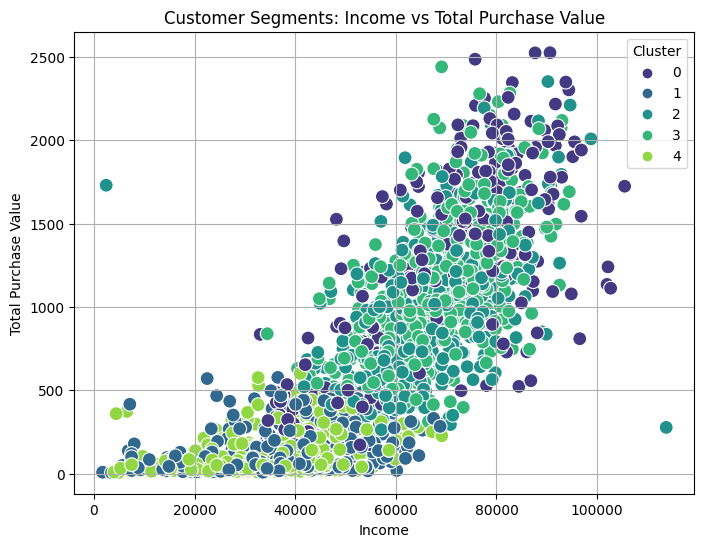

In [13]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Ensure the 'Cluster' column is treated as categorical
df['Cluster'] = df['Cluster'].astype('category')

# Scatter plot of Income vs Total Purchase Value colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Purchase_Value', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments: Income vs Total Purchase Value')
plt.xlabel('Income')
plt.ylabel('Total Purchase Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### 2. Bar Chart (Average Campaign Response per Cluster):

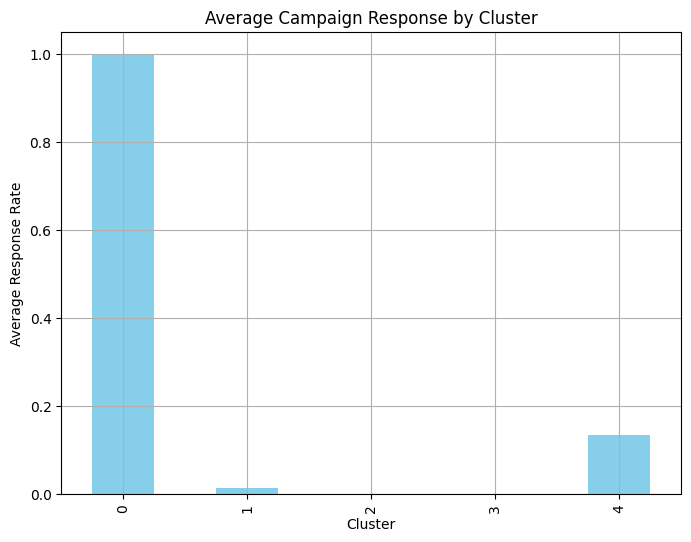

In [10]:
# Bar chart showing the average campaign response per cluster
plt.figure(figsize=(8, 6))
df.groupby('Cluster')['Response'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Campaign Response by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.show()


### Insights:

1. **Scatter Plot (Income vs Total Purchase Value)**:
   - The scatter plot shows how the clusters differ in terms of `Income` and `Total Purchase Value`.
   - **Cluster 0** and **Cluster 3** contain high-income customers with higher total purchase values, while **Cluster 1** and **Cluster 4** represent lower-income, low-spending customers.
   - **Cluster 2** shows high-income customers with moderate spending patterns.
   - The plot helps visualize the clear separation of customer segments based on purchasing power and spending behavior.

2. **Bar Chart (Average Campaign Response by Cluster)**:
   - The bar chart highlights how different clusters respond to marketing campaigns.
   - **Cluster 0** has a 100% response rate, indicating that customers in this segment are highly responsive to campaigns.
   - **Cluster 4** shows a higher-than-average response rate, while **Clusters 2 and 3** have almost no response to campaigns.
   - This visualization emphasizes which segments are more engaged with marketing efforts and which might need different strategies to improve engagement.

### Conclusion:
These visualizations provide a deeper understanding of the differences in income, spending behavior, and campaign response among the customer segments. We can now move forward with the final step of providing actionable insights and recommendations for the business.


## Step 6: **Insights and Recommendations:**

### Objective:
Based on the cluster analysis and visualizations, we will provide actionable insights and recommendations to improve marketing strategies, customer engagement, and overall business outcomes.

### Insights and Recommendations:

1. **Cluster 0 (High-Spending, Highly Responsive Customers)**:
   - **Insight**: This group has high income, frequent purchases, and a 100% response to marketing campaigns.
   - **Recommendation**: Focus marketing efforts on retaining and rewarding these customers with exclusive offers, loyalty programs, and premium product recommendations. They are your most valuable and engaged customers.

2. **Cluster 1 (Low-Spending, Low Engagement Customers)**:
   - **Insight**: These customers have low income, low spending, and are not engaged (long recency, low response rate).
   - **Recommendation**: Consider targeted re-engagement strategies such as offering discounts or special promotions. If engagement remains low, resources might be better allocated elsewhere.

3. **Cluster 2 (High-Spending, Low Campaign Response)**:
   - **Insight**: These are high-income customers who spend frequently but do not respond to marketing campaigns.
   - **Recommendation**: Revise your marketing strategies for this segment. Personalized, non-intrusive offers (such as targeted ads or product recommendations) might work better than traditional campaigns. Focus on understanding their needs and preferences.

4. **Cluster 3 (High-Spending, Low Engagement Customers)**:
   - **Insight**: These customers have high income and high spending, but they have not made purchases recently and are unresponsive to campaigns.
   - **Recommendation**: Implement re-engagement strategies tailored to their preferences, such as personalized offers, reminders, and time-sensitive deals. Understanding why their engagement dropped will be crucial for reactivating them.

5. **Cluster 4 (Low-Spending, Moderately Responsive Customers)**:
   - **Insight**: These are lower-income customers who spend infrequently, but they have a higher-than-average response rate to campaigns.
   - **Recommendation**: Offer promotions and discounts, as this group is price-sensitive but responds well to deals. Increase engagement by tailoring affordable product recommendations and creating campaigns that match their spending capabilities.

### General Recommendations:
- **Campaign Personalization**: Focus on personalized, data-driven marketing strategies for each segment, especially for clusters that show little response to standard campaigns.
- **Customer Retention**: Invest in loyalty programs and exclusive offers for high-spending, engaged customers to increase retention.
- **Re-engagement**: For clusters with low engagement but high spending potential, create strategies designed to reactivate them and maintain long-term relationships.

### Conclusion:
This customer segmentation provides a clear understanding of different customer profiles, enabling the business to tailor marketing strategies, improve customer satisfaction, and enhance overall business performance.
